In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sfp_nsdsyn import utils, two_dimensional_model as model
from sfp_nsdsyn import bootstrapping as bts
from sfp_nsdsyn.visualization import plot_2D_model_results as vis2D
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%load_ext autoreload
%autoreload 2

In [2]:
# Configuration
output_dir = '/Volumes/server/Projects/sfp_nsd/derivatives'
results_dir = os.path.join(output_dir, 'sfp_model', 'results_2D')
lr = 0.0005
max_epoch = 30000
vs = 'pRFsize'
n_permutations = 100

# Subject lists
nsd_subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1, 9)]
broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
broderick_subj_list = [utils.sub_number_to_string(i, 'broderick') for i in broderick_sn_list]

# Model loading args
ARGS_2D = ['sub', 'lr', 'eph', 'roi']
PARAMS_2D = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']

print(f'NSD subjects: {nsd_subj_list}')
print(f'Broderick subjects: {broderick_subj_list}')

NSD subjects: ['subj01', 'subj02', 'subj03', 'subj04', 'subj05', 'subj06', 'subj07', 'subj08']
Broderick subjects: ['wlsubj001', 'wlsubj006', 'wlsubj007', 'wlsubj045', 'wlsubj046', 'wlsubj062', 'wlsubj064', 'wlsubj081', 'wlsubj095', 'wlsubj114', 'wlsubj115', 'wlsubj121']


In [3]:
# Load NSD V1 models
nsd_pt_files = []
for subj in nsd_subj_list:
    file_name = os.path.join(results_dir, 'nsdsyn',
                             f'model-params_lr-{lr}_eph-{max_epoch}_sub-{subj}_roi-V1_vs-{vs}.pt')
    nsd_pt_files.append(file_name)

nsd_df = model.load_all_models(nsd_pt_files, *ARGS_2D)
print(f'NSD data shape: {nsd_df.shape}')
nsd_df.head()

NSD data shape: (8, 13)


,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sub,lr_rate,max_epoch,vroinames
0,2.536201,0.139149,0.271883,-0.072822,0.003162,-0.255981,0.014144,0.080796,-0.015730,subj01,0.0005,30000,V1
0,1.938979,0.148039,0.082835,0.147832,-0.039300,-0.038702,-0.000303,0.030481,-0.002720,subj02,0.0005,30000,V1
0,2.352920,0.056186,0.105715,0.152566,-0.006781,0.065288,-0.066534,0.006534,-0.023752,subj03,0.0005,30000,V1
0,1.942852,0.206604,0.119989,0.133012,-0.023695,0.069233,-0.062159,0.076657,-0.018837,subj04,0.0005,30000,V1
0,2.365176,0.118251,0.130331,0.028012,-0.033951,-0.117134,-0.089555,0.038780,-0.013571,subj05,0.0005,30000,V1


In [4]:
# Load Broderick V1 models
broderick_pt_files = []
for subj in broderick_subj_list:
    file_name = os.path.join(results_dir, 'broderick',
                             f'model-params_lr-{lr}_eph-{max_epoch}_sub-{subj}_roi-V1_vs-{vs}.pt')
    broderick_pt_files.append(file_name)

broderick_df = model.load_all_models(broderick_pt_files, *ARGS_2D)
print(f'Broderick data shape: {broderick_df.shape}')
broderick_df.head()

Broderick data shape: (12, 13)


,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sub,lr_rate,max_epoch,vroinames
0,2.991311,0.070599,0.401411,0.011372,-0.023886,0.007266,0.001402,0.031317,-0.007021,wlsubj001,0.0005,30000,V1
0,2.210414,0.191500,0.319517,0.072905,-0.027447,0.036066,-0.007128,0.047671,0.007991,wlsubj006,0.0005,30000,V1
0,1.859804,0.123400,0.329031,0.060774,-0.059881,0.160479,-0.006987,0.033783,0.018614,wlsubj007,0.0005,30000,V1
0,1.840788,0.137035,0.193624,0.066284,-0.050465,0.016446,-0.014239,0.080737,-0.027840,wlsubj045,0.0005,30000,V1
0,2.235469,0.101706,0.222241,0.039933,-0.024075,0.083406,0.020845,0.038723,-0.012789,wlsubj046,0.0005,30000,V1


In [5]:
# Load null NSD models (permuted data)
null_pt_files = []
for p in range(n_permutations):
    for subj in nsd_subj_list:
        file_name = os.path.join(results_dir, 'nsdsyn', 'perm', subj,
                                 f'perm-{p}_model-params_lr-{lr}_eph-{max_epoch}_sub-{subj}_roi-V1_vs-{vs}.pt')
        null_pt_files.append(file_name)

null_nsd_df = model.load_all_models(null_pt_files, *['sub', 'lr', 'eph', 'roi', 'perm'])
null_nsd_df['perm'] = null_nsd_df['perm'].astype(int)
print(f'Null NSD data shape: {null_nsd_df.shape}')
print(f'Number of permutations: {null_nsd_df["perm"].nunique()}')
null_nsd_df.head()

Null NSD data shape: (800, 14)
Number of permutations: 100


,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sub,lr_rate,max_epoch,vroinames,perm
0,8.344556,6.402747,6.478441,0.011790,-0.004045,-1.370019,0.834223,0.013898,-0.001160,subj01,0.0005,30000,V1,0
0,4.527784,0.612494,-0.174643,0.020044,-0.001698,-0.703148,0.718722,0.011895,0.004052,subj02,0.0005,30000,V1,0
0,4.740379,0.135906,0.299478,0.010406,0.003072,1.375295,0.791584,-0.007364,-0.001846,subj03,0.0005,30000,V1,0
0,4.795124,1.032707,-0.241707,-0.117397,-0.129154,-0.885448,0.413043,-0.013142,-0.024554,subj04,0.0005,30000,V1,0
0,10.175388,5.369055,6.361205,0.002037,0.004227,-1.390914,0.994338,-0.011198,-0.008207,subj05,0.0005,30000,V1,0


In [6]:
# Step 1: Set up dset_type columns
nsd_df_copy = nsd_df.copy()
broderick_df_copy = broderick_df.copy()
null_nsd_df_copy = null_nsd_df.copy()

nsd_df_copy['dset_type'] = 'NSD V1'
broderick_df_copy['dset_type'] = 'Broderick et al. V1'
null_nsd_df_copy['dset_type'] = 'Null NSD V1'

print('Dataset types assigned:')
print(f"  NSD: {nsd_df_copy['dset_type'].unique()}")
print(f"  Broderick: {broderick_df_copy['dset_type'].unique()}")
print(f"  Null NSD: {null_nsd_df_copy['dset_type'].unique()}")

Dataset types assigned:
  NSD: ['NSD V1']
  Broderick: ['Broderick et al. V1']
  Null NSD: ['Null NSD V1']


In [7]:
# Step 2: Calculate pooled SD from actual NSD + Broderick combined
actual_combined = pd.concat([nsd_df_copy, broderick_df_copy], axis=0)
print(f'Combined actual data shape: {actual_combined.shape}')

pooled_sd_df = bts.pooled_std(actual_combined, group_col='dset_type', params=PARAMS_2D)
print('\nPooled standard deviations:')
pooled_sd_df

Combined actual data shape: (20, 14)

Pooled standard deviations:


,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2
0,0.303617,0.052073,0.156767,0.069807,0.032712,0.106258,0.052954,0.031136,0.014144


In [8]:
# Step 3: Calculate standardized means for actual data
standardized_actual = bts.standardized_mean(actual_combined, pooled_sd_df, group_col='dset_type', params=PARAMS_2D)
print('Standardized means (mean / pooled_sd):')
standardized_actual

Standardized means (mean / pooled_sd):


,dset_type,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2
0,Broderick et al. V1,7.198124,2.230185,2.303295,1.069839,-0.882409,0.659274,-0.108925,1.429326,-0.363167
1,NSD V1,7.291595,2.757982,0.948625,1.349768,-0.921187,-0.354491,-1.514004,1.547921,-1.343738


In [9]:
# Step 4: Calculate MSE between standardized NSD and Broderick means
nsd_std_means = standardized_actual[standardized_actual['dset_type'] == 'NSD V1'][PARAMS_2D].values.squeeze()
broderick_std_means = standardized_actual[standardized_actual['dset_type'] == 'Broderick et al. V1'][PARAMS_2D].values.squeeze()

print('Standardized NSD V1 means:')
for p, v in zip(PARAMS_2D, nsd_std_means):
    print(f'  {p}: {v:.4f}')

print('\nStandardized Broderick V1 means:')
for p, v in zip(PARAMS_2D, broderick_std_means):
    print(f'  {p}: {v:.4f}')

# Calculate differences
differences = nsd_std_means - broderick_std_means
print('\nDifferences (NSD - Broderick):')
for p, d in zip(PARAMS_2D, differences):
    print(f'  {p}: {d:.4f}')

# Calculate MSE
actual_mse = np.mean(differences ** 2)
print(f'\n*** Actual MSE: {actual_mse:.4f} ***')

Standardized NSD V1 means:
  sigma: 7.2916
  slope: 2.7580
  intercept: 0.9486
  p_1: 1.3498
  p_2: -0.9212
  p_3: -0.3545
  p_4: -1.5140
  A_1: 1.5479
  A_2: -1.3437

Standardized Broderick V1 means:
  sigma: 7.1981
  slope: 2.2302
  intercept: 2.3033
  p_1: 1.0698
  p_2: -0.8824
  p_3: 0.6593
  p_4: -0.1089
  A_1: 1.4293
  A_2: -0.3632

Differences (NSD - Broderick):
  sigma: 0.0935
  slope: 0.5278
  intercept: -1.3547
  p_1: 0.2799
  p_2: -0.0388
  p_3: -1.0138
  p_4: -1.4051
  A_1: 0.1186
  A_2: -0.9806

*** Actual MSE: 0.6867 ***


In [10]:
# Step 5: Calculate standardized means for ALL null permutations at once (vectorized)
# This is the optimized approach using multi-column groupby
standardized_null = bts.standardized_mean(null_nsd_df_copy, pooled_sd_df, 
                                          group_col=['dset_type', 'perm'], params=PARAMS_2D)
print(f'Standardized null shape: {standardized_null.shape}')
print(f'Number of permutations: {standardized_null["perm"].nunique()}')
standardized_null.head()

Standardized null shape: (100, 11)
Number of permutations: 100


,dset_type,perm,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2
0,Null NSD V1,0,21.977673,53.613717,20.950426,-0.234218,-1.434053,-6.777867,13.096968,0.028447,-0.630505
1,Null NSD V1,1,29.537929,19.511730,17.899509,-0.027621,0.034127,-3.420038,-3.675973,-0.017351,0.681596
2,Null NSD V1,2,14.812430,2.962131,1.328914,0.648030,-0.464667,-1.303437,-8.194676,-0.046581,0.194580
3,Null NSD V1,3,15.726679,1.558749,0.498964,-0.351474,0.844472,0.966371,-8.360259,0.435894,0.894509
4,Null NSD V1,4,23.334379,27.751427,5.976596,-1.491820,0.774357,-7.689875,-1.441533,-0.390021,0.487588


In [11]:
# Step 6: Calculate MSE for each permutation using vectorized operations
# Extract null standardized means as array (n_perms x n_params)
null_std_array = standardized_null[PARAMS_2D].values

# broderick_std_means is constant, broadcast subtraction across all permutations
diff_squared = (null_std_array - broderick_std_means) ** 2  # shape: (n_perms, n_params)
null_mse_array = np.mean(diff_squared, axis=1)  # shape: (n_perms,)

# Get permutation indices in same order as standardized_null
perm_indices = standardized_null['perm'].values

# Create list of dicts for output
null_mse_list = [{'perm': int(p), 'mse': mse}
                 for p, mse in zip(perm_indices, null_mse_array)]

print(f'Calculated MSE for {len(null_mse_list)} permutations')
print(f'\nFirst 5 null MSE values:')
for d in null_mse_list[:5]:
    print(f"  Perm {d['perm']}: {d['mse']:.4f}")

Calculated MSE for 100 permutations

First 5 null MSE values:
  Perm 0: 382.2404
  Perm 1: 119.5060
  Perm 2: 14.6151
  Perm 3: 16.9103
  Perm 4: 112.2256


In [12]:
# Summary statistics
null_mse_values = [d['mse'] for d in null_mse_list]

print('='*50)
print('SUMMARY')
print('='*50)
print(f'Actual MSE (NSD V1 vs Broderick V1): {actual_mse:.4f}')
print(f'\nNull distribution statistics (n={len(null_mse_values)}):')
print(f'  Min:    {np.min(null_mse_values):.4f}')
print(f'  Max:    {np.max(null_mse_values):.4f}')
print(f'  Mean:   {np.mean(null_mse_values):.4f}')
print(f'  Median: {np.median(null_mse_values):.4f}')
print(f'  Std:    {np.std(null_mse_values):.4f}')

# Calculate p-value
p_value = np.mean(np.array(null_mse_values) <= actual_mse)
print(f'\nP-value (proportion of null <= actual): {p_value:.4f}')

SUMMARY
Actual MSE (NSD V1 vs Broderick V1): 0.6867

Null distribution statistics (n=100):
  Min:    2.1156
  Max:    1817.6969
  Mean:   265.9532
  Median: 173.5790
  Std:    301.2721

P-value (proportion of null <= actual): 0.0000


In [15]:
# Calculate both MSE and correlation using the function
(actual_mse_func, actual_corr_func), null_result_list = bts.calculate_standardized_metric_comparison(
    nsd_df, broderick_df, null_nsd_df, params=PARAMS_2D, metric='both')

# Extract null values for each metric
null_mse_values = [d['mse'] for d in null_result_list]
null_corr_values = [d['corr'] for d in null_result_list]

# Calculate p-values
p_mse = np.mean(np.array(null_mse_values) <= actual_mse_func)
p_corr = np.mean(np.array(null_corr_values) >= actual_corr_func)

print('='*60)
print('COMPARISON METRICS (NSD V1 vs Broderick V1)')
print('='*60)
print(f'\nActual MSE:         {actual_mse_func:.4f}')
print(f'Actual Correlation: {actual_corr_func:.4f}')
print(f'\nP-value (MSE, null <= actual):     {p_mse:.4f}')
print(f'P-value (Corr, null >= actual):    {p_corr:.4f}')
print(f'\nNull MSE range:  [{np.min(null_mse_values):.4f}, {np.max(null_mse_values):.4f}]')
print(f'Null Corr range: [{np.min(null_corr_values):.4f}, {np.max(null_corr_values):.4f}]')

COMPARISON METRICS (NSD V1 vs Broderick V1)

Actual MSE:         0.6867
Actual Correlation: 0.9654

P-value (MSE, null <= actual):     0.0000
P-value (Corr, null >= actual):    0.0000

Null MSE range:  [2.1156, 1817.6969]
Null Corr range: [0.2364, 0.9064]


In [16]:
# Create result DataFrame with both metrics
result_df = bts.create_metric_comparison_df((actual_mse_func, actual_corr_func), null_result_list, metric='both')
print(f'Result DataFrame shape: {result_df.shape}')
print(f'Columns: {result_df.columns.tolist()}')
result_df.head(10)

Result DataFrame shape: (101, 4)
Columns: ['perm', 'mse', 'corr', 'type']


,perm,mse,corr,type
0,-1,0.686650,0.965355,actual
1,0,382.240391,0.465024,null
2,1,119.506015,0.869098,null
3,2,14.615141,0.885705,null
4,3,16.910270,0.841745,null
5,4,112.225623,0.708294,null
6,5,68.216274,0.769120,null
7,6,2.115571,0.906393,null
8,7,217.873990,0.702863,null
9,8,51.461484,0.868762,null


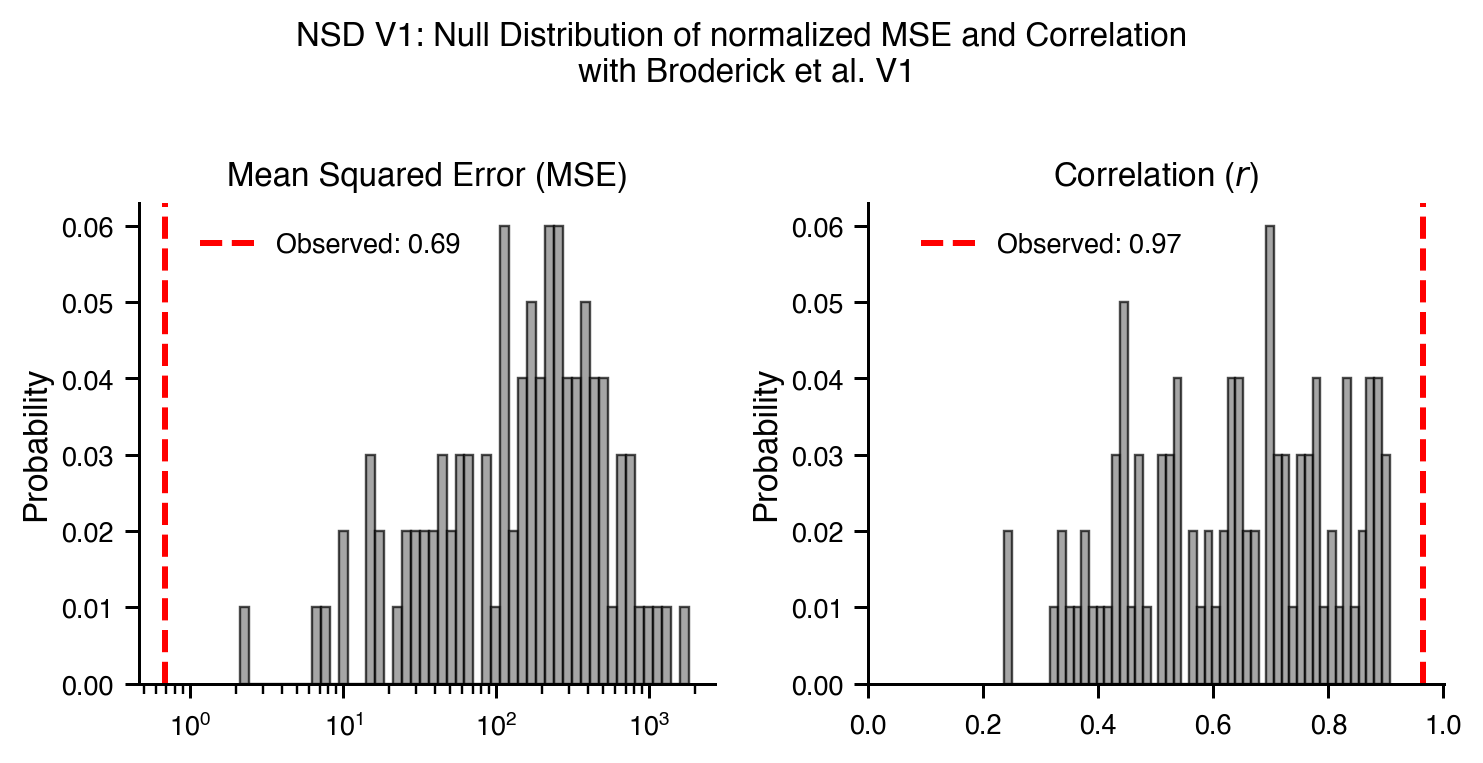

In [43]:
# Plot combined null distribution (MSE and Correlation side-by-side)
fig, axes = vis2D.plot_null_distribution_comparison(
    null_mse_values, actual_mse_func,
    null_corr_values, actual_corr_func,
    title=f'NSD V1: Null Distribution of normalized MSE and Correlation\n with Broderick et al. V1')
plt.show()